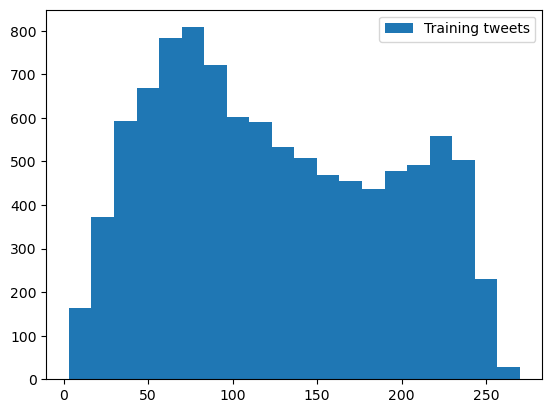

/var/folders/gj/gyy0sxs96ns46ccr129t75_w0000gn/T/ipykernel_59164/1532911914.py:114: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combine=data.append(data,ignore_index=True) #it combines the train and test dataset


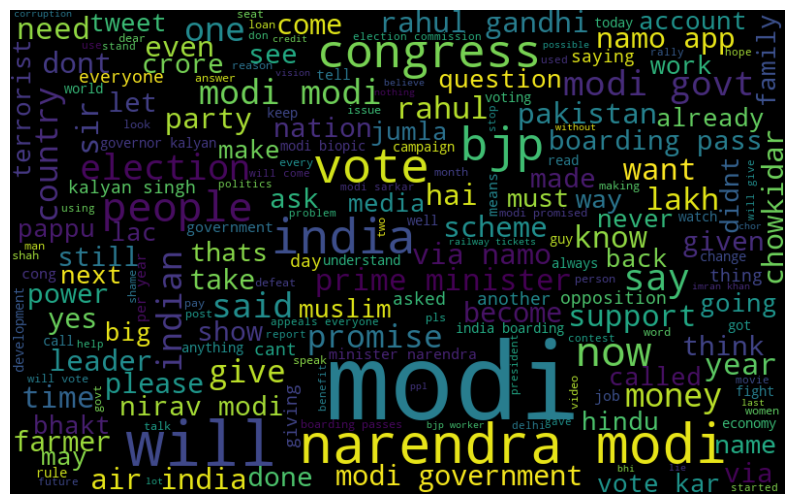

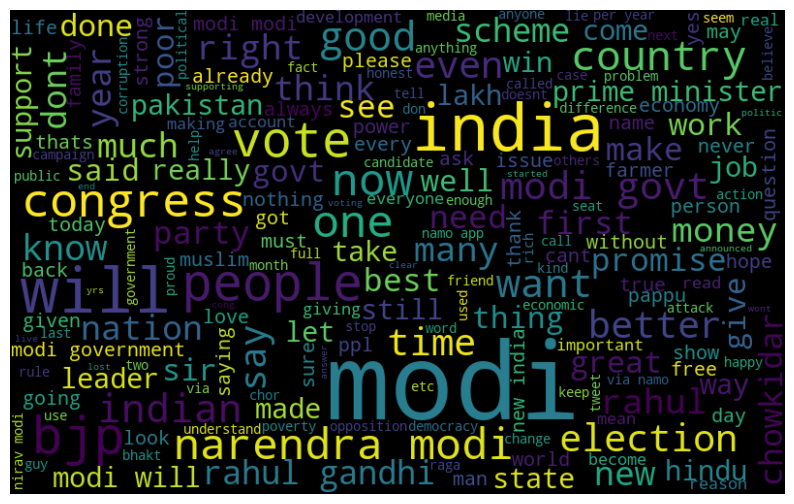




SVM method
Accuracy: 0.9643
Precision: 0.9644425602348341
Recall: 0.9643
F1 Score: 0.9641768181275558



Decision Tree method
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


/Users/srujithadevineni/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(





Logistic Regression method
Accuracy: 0.9361
Precision: 0.9369447515031792
Recall: 0.9361
F1 Score: 0.935564016584871



KNN method
Accuracy: 0.6104
Precision: 0.7290688879554559
Recall: 0.6104
F1 Score: 0.5971268389216104



Multinomial Naive method
Accuracy: 0.7098
Precision: 0.8158615777123513
Recall: 0.7098
F1 Score: 0.6881823707439435



Random Forest method
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
F1 Score: 1.0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [1]:
#!/usr/bin/env python
# coding: utf-8

# In[ ]:


#twitter sentiment dataset


# In[5]:


import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Read the first 1000 rows of the dataset



# In[24]:


# Read the first 1000 rows of the dataset
data = pd.read_csv("/Users/srujithadevineni/research/Sentimental_analysis/Datasets/Twitter_Data.csv", nrows=10000)



# In[25]:


import os


# In[26]:


os.getcwd()


# In[27]:


#  os.chdir('/Users/srujithadevineni/research/Sentimental_analysis/Datasets/Twitter_Data.csv"')


# In[28]:


data


# In[29]:


data['category'].value_counts()


# In[30]:


data[data['category']==0].head(10)


# In[31]:


data[data['category']==1].head(10)


# In[35]:


import matplotlib.pyplot as plt
import warnings


# In[36]:


pd.set_option("display.max_colwidth",200) 
warnings.filterwarnings("ignore",category=DeprecationWarning)
get_ipython().run_line_magic('matplotlib', 'inline')


# In[37]:


length_train_dataset=data['clean_text'].str.len()
plt.hist(length_train_dataset,bins=20,label="Training tweets")
plt.legend() #shows the label inside histogram
plt.show() #shows the histogram


# In[61]:


def remove_pattern(input_txt,pattern):  #user-defined function to remove patterns
    r = re.findall(pattern,input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt  


# In[62]:


combine=data.append(data,ignore_index=True) #it combines the train and test dataset
combine.shape


# In[63]:


import numpy as np
import re #for regular expressions


# In[68]:


get_ipython().system('pip install wordcloud')
from wordcloud import WordCloud


# In[71]:


normal_words =' '.join(str(text) for text in combine['clean_text'][combine['category'] == 0])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()


# In[73]:


negative_words =' '.join(str(text) for text in combine['clean_text'][combine['category'] == 1])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()


# In[78]:
! pip install textblob

from textblob import TextBlob
# function to calculate subjectivity
def getSubjectivity(clean_text):
    return TextBlob(clean_text).sentiment.subjectivity
    # function to calculate polarity
    def getPolarity(clean_text):
        return TextBlob(clean_text).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'


# In[99]:


savedtweet = pd.read_csv('/Users/srujithadevineni/research/Sentimental_analysis/Datasets/Twitter_Data.csv') #reads csv file
savedtweet.head()


# In[ ]:





# In[105]:


#SHOWS SUBJECTIVITY AND POLARITY
def getSubjectivity(text):
    return TextBlob(str(text)).sentiment.subjectivity
#get polarity with a function
def getPolarity(text):
    return TextBlob(str(text)).sentiment.polarity
savedtweet['Subjectivity'] =savedtweet['clean_text'].apply(getSubjectivity)
savedtweet['Polarity'] = savedtweet['clean_text'].apply(getPolarity)
savedtweet.drop('clean_text', axis=1).head() #shows polarity and subjectivity of each tweet and drops the uncleaned tweets column


# In[107]:


#create a function to check negative, neutral and positive analysis
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score ==0:
        return 'Neutral'
    else:
        return 'Positive'
    
savedtweet['Analysis'] = savedtweet['Polarity'].apply(getAnalysis)
savedtweet.head()


# In[16]:


from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB 
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score


# In[17]:


# from keras.models import Sequential, load_model
# from tensorflow.keras.layers import Input,Conv1D,MaxPooling1D,Dense,GlobalMaxPooling1D,Embedding
# from tensorflow.keras.models import Model


# In[18]:


!pip install xgboost


# In[19]:


from xgboost import XGBClassifier
from scipy.sparse import lil_matrix


# In[173]:


# Replace NaN values with an empty string
data.fillna("", inplace=True)

# Extract the text data and category labels
text_data = data["clean_text"].values.astype("U")
category_labels = data["category"].values

# Create a TfidfVectorizer object and fit it to the text data
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(text_data)

# Create a list of classifiers to compare
classifiers = [
    ("SVM", SVC(kernel='linear')),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Logistic Regression", LogisticRegression()),
    ("KNN", KNeighborsClassifier()),
    ("Multinomial Naive",MultinomialNB()),
    ("Random Forest",RandomForestClassifier())

]

# Evaluate each classifier and print the results
for clf_name, clf_model in classifiers:
    clf_model.fit(tfidf_matrix, category_labels)
    predicted_labels = clf_model.predict(tfidf_matrix)
    #for clf_name in classifiers:
        ##predictions[clf_name] = clf_model.predict(X_test)
        # Generate and display confusion matrices
    #for clf_name, y_pred in predictions.items():
        #cm = confusion_matrix(y_test, y_pred)
        #print(f"Confusion matrix for {clf_name}:")
        #print(cm)
        # Visualize confusion matrix
        #disp =sns.heatmap(cm,annot=True,cmap='Blues',fmt=' ')
        #ax.set_title(f'Confusion Matrix - {clf_name}')
        #ax.set_xlabel('y_test')
        #ax.set_ylabel('y_pred')
        #plt.show()
    
    
    

    accuracy = accuracy_score(category_labels, predicted_labels)
    precision = precision_score(category_labels, predicted_labels, average='weighted')
    recall = recall_score(category_labels, predicted_labels, average='weighted')
    f1 = f1_score(category_labels, predicted_labels, average='weighted')

    print(f"\n\n\n{clf_name} method")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)




# In[174]:


import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
import xgboost as xgb

# Load example data (you should replace this with your own data)
data = load_iris()
X, y = data.data, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the XGBoost model
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Print the results
print("F1 Score:", f1)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


# In[ ]:






In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

# Read the first 1000 rows of the dataset
data = pd.read_csv("/Users/srujithadevineni/research/Sentimental_analysis/Datasets/Twitter_Data.csv", nrows=10000)

# Replace NaN values with an empty string
data.fillna("", inplace=True)

# Extract the text data and category labels
text_data = data["clean_text"].values.astype("U")
category_labels = data["category"].values

# Use LabelEncoder to convert string labels into numeric values
label_encoder = LabelEncoder()
category_labels = label_encoder.fit_transform(category_labels)

# Create a TfidfVectorizer object and fit it to the text data
vectorizer = TfidfVectorizer()
vectorizer.fit(text_data)

# Convert the text data to a sparse matrix of TF-IDF values
tfidf_matrix = vectorizer.transform(text_data)

# Create an XGBClassifier model and fit it to the TF-IDF matrix and category labels
xgb = XGBClassifier()
xgb.fit(tfidf_matrix, category_labels)

# Predict the category labels for the training data
predicted_labels = xgb.predict(tfidf_matrix)

# Calculate the evaluation metrics
accuracy = accuracy_score(category_labels, predicted_labels)
precision = precision_score(category_labels, predicted_labels, average='weighted')
recall = recall_score(category_labels, predicted_labels, average='weighted')
f1 = f1_score(category_labels, predicted_labels, average='weighted')

# Print the evaluation metrics
print("xgboost method")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


xgboost method
Accuracy: 0.9096
Precision: 0.91885080467669
Recall: 0.9096
F1 Score: 0.9095051953925671
